<a href="https://colab.research.google.com/github/Harsh7wardhan/Machine-Learning/blob/main/DIS_TWEETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_data=pd.read_csv("train.csv")
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_data=pd.read_csv("test.csv")
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
print(train_data.shape)
print(test_data.shape)

(7613, 5)
(3263, 4)


In [5]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


In [6]:
train_data=train_data.drop(['keyword','location','id'],axis=1)
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
test_data=test_data.drop(['keyword','location',],axis=1)
test_data.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [32]:
test_data.reset_index()

,index,id,text
0,0,0,Just happened a terrible car crash
1,1,2,"Heard about #earthquake is different cities, s..."
2,2,3,"there is a forest fire at spot pond, geese are..."
3,3,9,Apocalypse lighting. #Spokane #wildfires
4,4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,3259,10865,Storm in RI worse than last hurricane. My city...
3260,3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [9]:
train_data.isnull().sum()

text      0
target    0
dtype: int64

In [10]:
X=train_data['text']
y=train_data['target']

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [13]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(train_data)):
    review = re.sub('[^a-zA-Z]', ' ', train_data['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [14]:
print(corpus)
print(len(corpus))

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'top hill see fire wood', 'emerg evacu happen build across street', 'afraid tornado come area', 'three peopl die heat wave far', 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood', 'rain flood florida tampabay tampa day lost count', 'flood bago myanmar arriv bago', 'damag school bu multi car crash break', 'man', 'love fruit', 'summer love', 'car fast', 'goooooooaaaaaal', 'ridicul', 'london cool', 'love ski', 'wonder day', 'looooool', 'way eat shit', 'nyc last week', 'love girlfriend', 'cooool', 'like pasta', 'end', 'bbcmtd wholesal market 

In [15]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [18]:
from sklearn.metrics import accuracy_score , confusion_matrix , plot_confusion_matrix
import itertools

MULTINOMIAL NB


accuracy:   0.793


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


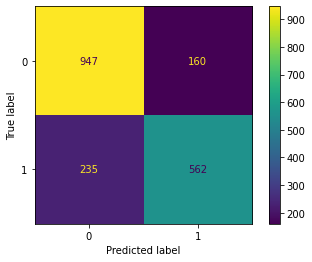

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier_nb=MultinomialNB()

classifier_nb.fit(X_train, y_train)
pred_1 = classifier_nb.predict(X_test)
score_1 = accuracy_score(y_test, pred_1)
print("accuracy:   %0.3f" % score_1)
cm_1 = confusion_matrix(y_test, pred_1)
plot_confusion_matrix(classifier_nb,X_test,y_test)


Passive Aggressive Classifier Algorithm




accuracy:   0.779


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


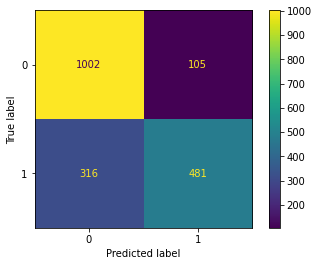

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(X_train, y_train)
pred_2 = linear_clf.predict(X_test)
score_2 = accuracy_score(y_test, pred_2)
print("accuracy:   %0.3f" % score_2)
cm_2 = confusion_matrix(y_test, pred_2)
plot_confusion_matrix(linear_clf,X_test,y_test)

Decision Tree Model

accuracy:   0.779


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


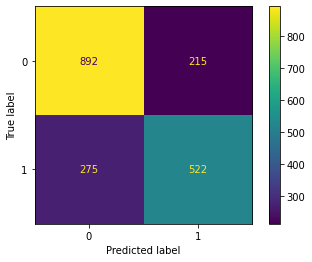

In [21]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=55)

decisionTreeModel.fit(X_train,y_train)
pred_3 = linear_clf.predict(X_test)
score_3 = accuracy_score(y_test, pred_3)
print("accuracy:   %0.3f" % score_3)
cm_3 = confusion_matrix(y_test, pred_3)
plot_confusion_matrix(decisionTreeModel,X_test,y_test)

 Gradient Boosting Mode

accuracy:   0.779


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


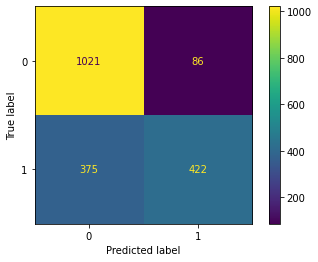

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostingModel = GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 100,
                                                   max_depth = 30,
                                                   random_state=55)

gradientBoostingModel.fit(X_train,y_train)
pred_4 = linear_clf.predict(X_test)
score_4 = accuracy_score(y_test, pred_4)
print("accuracy:   %0.3f" % score_4)
cm_4 = confusion_matrix(y_test, pred_4)
plot_confusion_matrix(gradientBoostingModel,X_test,y_test)

accuracy:   0.779


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


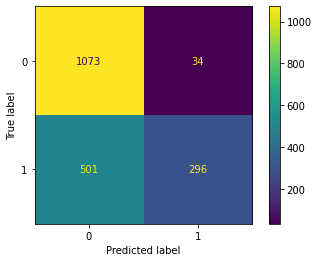

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsModel = KNeighborsClassifier(n_neighbors = 7,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(X_train,y_train)
pred_5 = linear_clf.predict(X_test)
score_5 = accuracy_score(y_test, pred_5)
print("accuracy:   %0.3f" % score_5)
cm_5 = confusion_matrix(y_test, pred_5)
plot_confusion_matrix(KNeighborsModel,X_test,y_test)

accuracy:   0.813


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


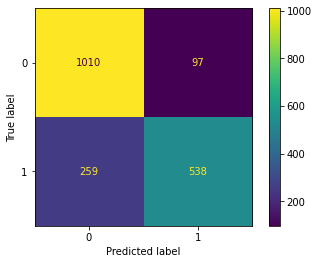

In [24]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)
pred_6 = classifier_svc.predict(X_test)
score_6 = accuracy_score(y_test, pred_6)
print("accuracy:   %0.3f" % score_6)
cm_5 = confusion_matrix(y_test, pred_6)
plot_confusion_matrix(classifier_svc,X_test,y_test)

In [25]:
ps = PorterStemmer()
corpus_new = []
for i in range(0, len(test_data)):
    review_new = re.sub('[^a-zA-Z]', ' ', test_data['text'][i])
    review_new = review_new.lower()
    review_new = review_new.split()
    
    review_new = [ps.stem(word) for word in review_new if not word in stopwords.words('english')]
    review_new = ' '.join(review_new)
    corpus_new.append(review_new)

In [26]:
corpus_new

['happen terribl car crash',
 'heard earthquak differ citi stay safe everyon',
 'forest fire spot pond gees flee across street cannot save',
 'apocalyps light spokan wildfir',
 'typhoon soudelor kill china taiwan',
 'shake earthquak',
 'probabl still show life arsen yesterday eh eh',
 'hey',
 'nice hat',
 'fuck',
 'like cold',
 'nooooooooo',
 'tell',
 '',
 'awesom',
 'birmingham wholesal market ablaz bbc news fire break birmingham wholesal market http co irwqcezweu',
 'sunkxssedharri wear short race ablaz',
 'previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz http co cmghxba xi',
 'check http co roi nsmejj http co tj zjin http co yduixefip http co lxtjc kl nsfw',
 'psa split person techi follow ablaz co burner follow ablaz',
 'bewar world ablaz sierra leon amp guap',
 'burn man ablaz turban diva http co hodwosamw via etsi',
 'diss song peopl take thing run smh eye open though set game ablaz cyhitheprync',
 'rape victim die set ablaz year old girl die burn injuri 

In [27]:
X_final = cv.fit_transform(corpus_new).toarray()
X_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
y_predictions=classifier_svc.predict(X_final)


In [29]:
len(y_predictions)

3263

In [ ]:
sample_sub=pd.read_csv("sample_submission.csv")

In [34]:
my_submission = pd.DataFrame({'id': test_data.id, 'target': y_predictions})
my_submission.to_csv('my_submission.csv', index=False)